<a href="https://colab.research.google.com/github/RoginRobert2014/CE888/blob/main/Lab6/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt 

In [23]:
country_df = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv', header=0, index_col=None)
country_df.head(8)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900


In [20]:
x = country_df.iloc[:, 1:10]
y = country_df.iloc[:, 0:1]
print(x.head())
print(y.head())

   child_mort  exports  health  ...  life_expec  total_fer   gdpp
0        90.2     10.0    7.58  ...        56.2       5.82    553
1        16.6     28.0    6.55  ...        76.3       1.65   4090
2        27.3     38.4    4.17  ...        76.5       2.89   4460
3       119.0     62.3    2.85  ...        60.1       6.16   3530
4        10.3     45.5    6.03  ...        76.8       2.13  12200

[5 rows x 9 columns]
               country
0          Afghanistan
1              Albania
2              Algeria
3               Angola
4  Antigua and Barbuda


In [21]:
kmeans_model = cluster.KMeans(n_clusters=3)
kmeans_model.fit(x)
print(kmeans_model.labels_)

[0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 2 1 0 0 0 0 0 0 1 2 0 0 0 0 1 0 0 0 0 2 0 1 0 0 1 1 0 0 0 0 1 2 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


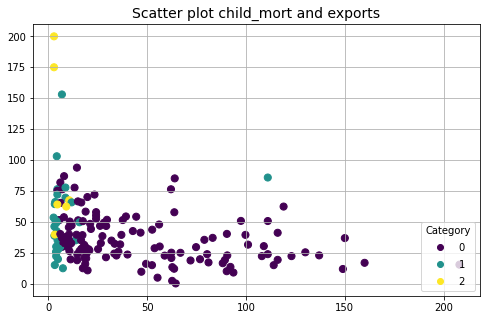

In [43]:
plt.figure(figsize=(8,5))
plt.title("Scatter plot child_mort and exports", fontsize=14)
plt.grid(True)

scatter = plt.scatter(x['child_mort'],x['exports'],c=kmeans_model.labels_,cmap='viridis',s=50)
plt.legend(*scatter.legend_elements(), loc="lower right", title="Category")
plt.show()

In [44]:
labelled_data = country_df.copy()
labelled_data['label'] = kmeans_model.labels_
labelled_data['label'].value_counts()

0    128
1     32
2      7
Name: label, dtype: int64

In [30]:
labelled_data[['label']] = labelled_data['label'].replace([0,1,2], ['under-developing country', 'developing country', 'developed country'])
labelled_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,under-developing country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,under-developing country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,under-developing country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,under-developing country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,under-developing country
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,under-developing country
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,under-developing country
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,under-developing country
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,under-developing country
